# Метод K ближайших соседей

Метод K ближайших соседей (KNN) — это простой алгоритм машинного обучения для классификации и регрессии. Основывается на идее, что объекты, расположенные близко друг к другу, принадлежат к одному классу (для классификации) или имеют схожие значения (для регрессии). Для предсказания метки или значения для нового объекта, KNN находит K ближайших соседей в обучающей выборке и принимает решение на основе их меток или средних значений.

## Из методички

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
features = iris.data

data = pd.DataFrame(features, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
X = data.iloc[:, [0, 2]] # длина чашелистика и длина лепестка
y = iris.target
X.shape, y.shape

((150, 2), (150,))

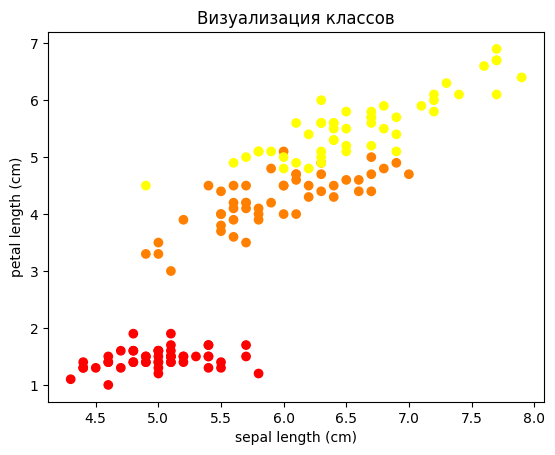

In [5]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.title("Визуализация классов")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

MinMaxScaler масштабирует данные в диапазон от 0 до 1, каждый призна котносительно мин и макс

StandardScaler приводит данные к стандартному виду с нулевым средним стандартным отклонением

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

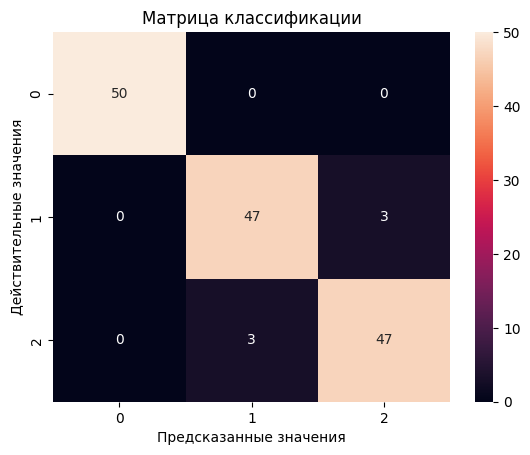

In [9]:
plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

# из 150 точек неверно только 6 (первый класс безошибочно, путает второй и третий)

In [10]:
from sklearn.metrics import classification_report

In [11]:
print(classification_report(y_pred, y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [12]:
# границы принятия решений
X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

In [13]:
XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


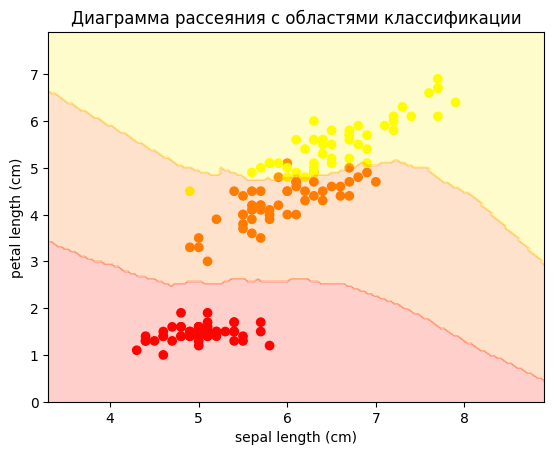

In [14]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

In [15]:
observation_new = [[5.5, 5]] # новый объект

In [16]:
observation_new_scaled = scaler.transform(observation_new)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [17]:
knn.predict(observation_new_scaled) # к какому классу относится

array([2])

In [18]:
knn.predict_proba(observation_new_scaled) # вероятности отнесения объекта к каждому классу

array([[0., 0., 1.]])

In [19]:
distances, indices = knn.kneighbors(observation_new_scaled) # ближайшие к новому

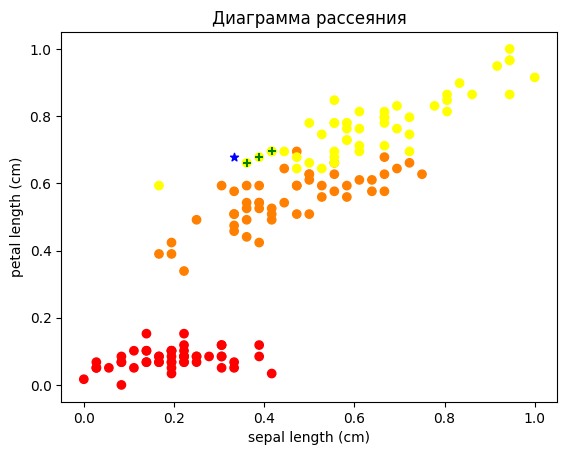

In [20]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

## Задания для самостоятельного выполнения

*1. Постройте последний график методических указаний в исходном пространстве признаков.*

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


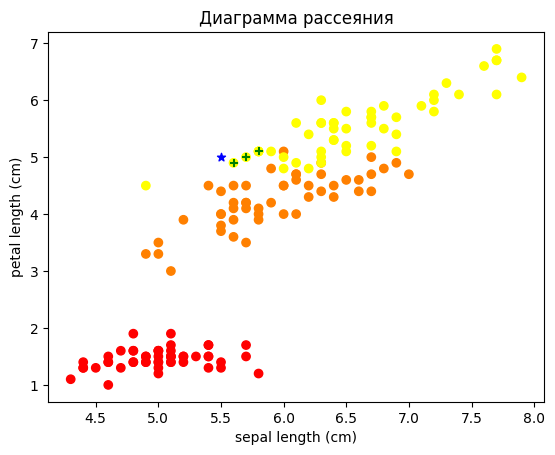

In [21]:
iris = load_iris()
features = iris.data
data = pd.DataFrame(features, columns=iris.feature_names)
X = data.iloc[:, [0, 2]]
y = iris.target

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)


observation_new = [[5.5, 5]]

distances, indices = knn.kneighbors(observation_new)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')  # scatter plot для всех данных
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b')  # новое наблюдение

for i in range(3):
    plt.scatter(X.iloc[indices[0][i], 0], X.iloc[indices[0][i], 1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()


*2. Попробуйте обучить модель с другим значением k. Визуализируйте области классификации и сравните эффективности модели.*

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


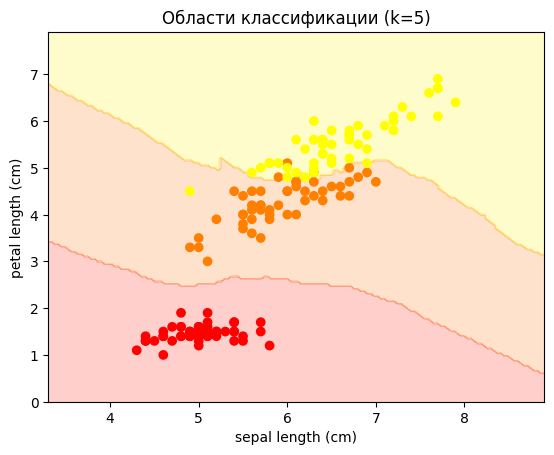

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.94      0.93        50
           2       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [22]:
iris = load_iris()
features = iris.data
data = pd.DataFrame(features, columns=iris.feature_names)
X = data.iloc[:, [0, 2]]
y = iris.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


# KNN с k=5
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

X0 = np.linspace(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)
XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T
XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.title(f"Области классификации (k={k})")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

print(classification_report(y, y_pred))


*3. Подвигайте новое наблюдение в последнем пункте методических указаний. Сдвиньте его за пределы области определения выборки. Как меняется нормализованное значение?*

Нормализованное значение исходного наблюдения: [[0.33333333 0.6779661 ]]
Нормализованное значение сдвинутого наблюдения: [[0.88888889 1.01694915]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


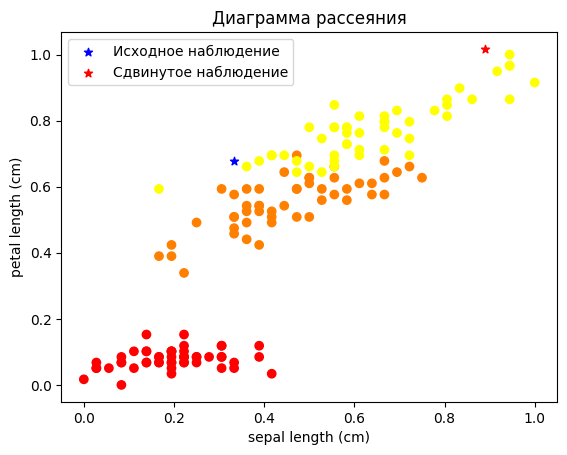

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

observation_new = [[5.5, 5]]

observation_new_scaled = scaler.transform(observation_new)
print("Нормализованное значение исходного наблюдения:", observation_new_scaled)

observation_new_shifted = [[7.5, 7]] # за пределы области выборки

observation_new_shifted_scaled = scaler.transform(observation_new_shifted)
print("Нормализованное значение сдвинутого наблюдения:", observation_new_shifted_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')
plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b', label="Исходное наблюдение")
plt.scatter(observation_new_shifted_scaled[0][0], observation_new_shifted_scaled[0][1], marker='*', color='r', label="Сдвинутое наблюдение")
plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend()
plt.show()


*4. Поэкспериментируйте с разными метриками расстояния. Визуализируйте ближайших соседей нового объекта при разных метриках расстояния.*

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


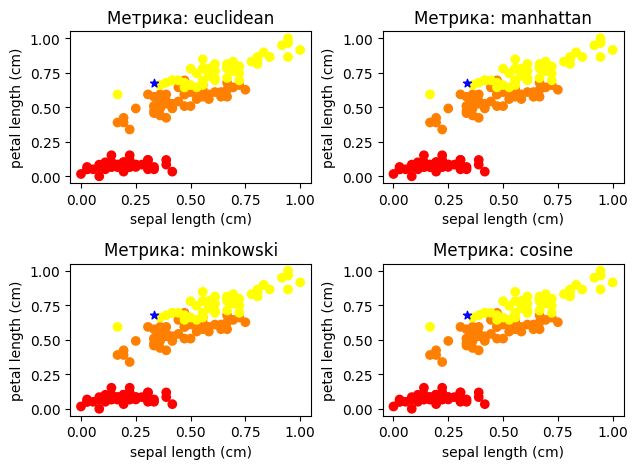

In [24]:
metrics = ['euclidean', 'manhattan', 'minkowski', 'cosine']
observation_new = [[5.5, 5]]
observation_new_scaled = scaler.transform(observation_new)

for i, metric in enumerate(metrics, 1):
    knn = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn.fit(X_scaled, y)

    plt.subplot(2, 2, i)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')
    plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b', label="Новый объект")

    plt.title(f"Метрика: {metric}")
    plt.xlabel('sepal length (cm)')
    plt.ylabel('petal length (cm)')

plt.tight_layout()
plt.show()


*5. Обучите модель на полном датасете. Сравните ее эффективность с описанной в методических указаниях. Попробуйте разные значения k.*

In [25]:
k_values = [1, 3, 5, 7, 10]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scaled, y)

    y_pred = knn.predict(X_scaled)

    accuracy = accuracy_score(y, y_pred)

    print(f"Для k = {k}:")
    print(f"Точность: {accuracy}")
    print()



Для k = 1:
Точность: 0.9933333333333333

Для k = 3:
Точность: 0.96

Для k = 5:
Точность: 0.9533333333333334

Для k = 7:
Точность: 0.96

Для k = 10:
Точность: 0.94



*6. Попробуйте в модели на полном датасете взвешенный алгоритм (аргумент weights объекта KNeighborsClassifier). Сравние его точность с равномерным вариантом.*

In [26]:
knn_uniform = KNeighborsClassifier(n_neighbors=3, weights='uniform') # равномерные веса
knn_uniform.fit(X_scaled, y)

y_pred_uniform = knn_uniform.predict(X_scaled)

accuracy_uniform = accuracy_score(y, y_pred_uniform)


knn_weighted = KNeighborsClassifier(n_neighbors=3, weights='distance') # взвешенные веса
knn_weighted.fit(X_scaled, y)

y_pred_weighted = knn_weighted.predict(X_scaled)

accuracy_weighted = accuracy_score(y, y_pred_weighted)


print("Точность модели с равномерными весами:", accuracy_uniform)
print()
print("Точность модели с взвешенными весами:", accuracy_weighted)


Точность модели с равномерными весами: 0.96

Точность модели с взвешенными весами: 0.9933333333333333


*7. Постройте график точности (accuracy) модели в зависимости от значения k. Сделайте вывод.*

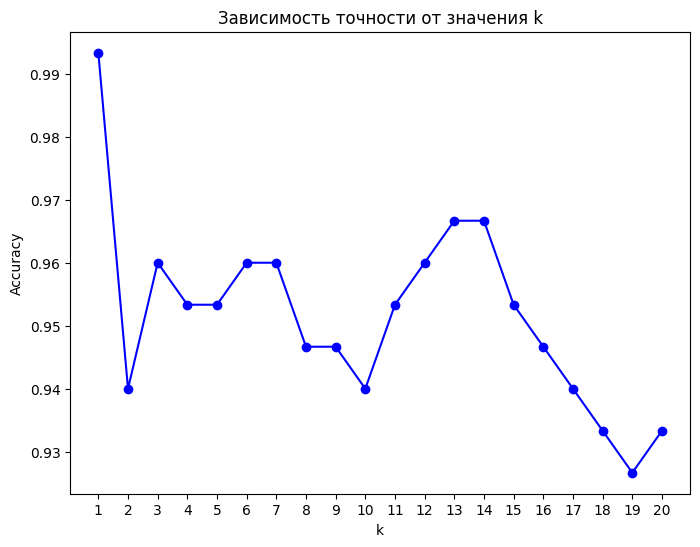

In [27]:
k_values = range(1, 21)

accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scaled, y)
    y_pred = knn.predict(X_scaled)
    accuracy = accuracy_score(y, y_pred)
    accuracies += [accuracy]

plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Зависимость точности от значения k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()


*8. Выберите датасет и постройте регрессию при помощи метода ближайших соседей.*

In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
california_housing = fetch_california_housing()
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = california_housing.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_scaled, y)

y_pred = knn_regressor.predict(X_scaled)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse:.4f}")
print(f"R^2: {r2:.4f}")


MSE: 0.2553
R^2: 0.8083
